In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
stress= pd.read_csv('/content/dreaddit-test.csv')

In [85]:
stress1= pd.read_csv('/content/dreaddit-train.csv')

# **Exploration**

In [86]:
whole=stress1.append(stress)

In [87]:
whole.head(5)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1.521614e+09,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1.527010e+09,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1.535936e+09,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1.516430e+09,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1.539809e+09,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [88]:
test = whole.drop(['post_id', 'sentence_range', 'id'], axis = 1)

In [89]:
test.head(2)

,subreddit,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,"He said he had not felt that way before, sugge...",1,0.8,1.521614e+09,5,1.806818,116,72.64,15.04,...,1.000,1.125,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,1.0,1.527010e+09,4,9.429737,109,79.08,76.85,...,1.125,1.000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857


In [90]:
whole.shape

(3553, 116)

In [91]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3553 entries, 0 to 714
Columns: 116 entries, subreddit to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 3.2+ MB


In [92]:
whole.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,3553.000000,3553.000000,3553.000000,3.553000e+03,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,...,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000
mean,13774.009288,0.522657,0.790644,1.517999e+09,19.543203,4.688569,85.929918,35.140816,40.437610,67.622440,...,1.086601,1.119619,1.000225,1.722884,1.535102,1.879306,0.846088,9.747819,5.458644,0.041667
std,17424.172858,0.499557,0.218379,1.552489e+07,87.263634,3.301673,32.105144,26.452202,31.449231,32.658996,...,0.115371,0.086195,0.006708,0.048044,0.102542,0.058354,0.174756,20.324300,2.526593,0.195195
min,2.000000,0.000000,0.000000,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-2.318095,-1.000000
25%,913.000000,0.000000,0.600000,1.509657e+09,2.000000,2.475093,65.000000,12.410000,11.820000,43.370000,...,1.000000,1.000000,1.000000,1.691880,1.468180,1.841840,0.750000,2.000000,3.718596,-0.068939
50%,1860.000000,1.000000,0.800000,1.516974e+09,5.000000,4.348333,81.000000,29.600000,33.190000,81.220000,...,1.000000,1.142900,1.000000,1.721310,1.528700,1.878240,0.900000,5.000000,5.219455,0.043384
75%,25733.000000,1.000000,1.000000,1.530921e+09,10.000000,6.537891,101.000000,54.500000,68.290000,96.400000,...,1.142900,1.142900,1.000000,1.752050,1.595740,1.915650,1.000000,10.000000,6.891960,0.164286
max,55783.000000,1.000000,1.000000,1.542592e+09,1687.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.777800,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [93]:
stress.isnull().sum()

id                          0
subreddit                   0
post_id                     0
sentence_range              0
text                        0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [94]:
whole.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [95]:
whole['subreddit'].unique()

array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       'domesticviolence', 'anxiety', 'homeless', 'stress',
       'almosthomeless', 'food_pantry'], dtype=object)

In [96]:
stressfull = whole[whole['label']==1]
notstress = whole[whole['label']==0]

In [97]:
print('total =' , len(whole))
print('people who had stress =' ,len(stressfull) )
print('people who hadnot stress=' ,len(notstress) )

total = 3553
people who had stress = 1857
people who hadnot stress= 1696


ptsd                711
relationships       694
anxiety             650
domesticviolence    388
assistance          355
survivorsofabuse    315
homeless            220
almosthomeless       99
stress               78
food_pantry          43
Name: subreddit, dtype: int64


<Axes: >

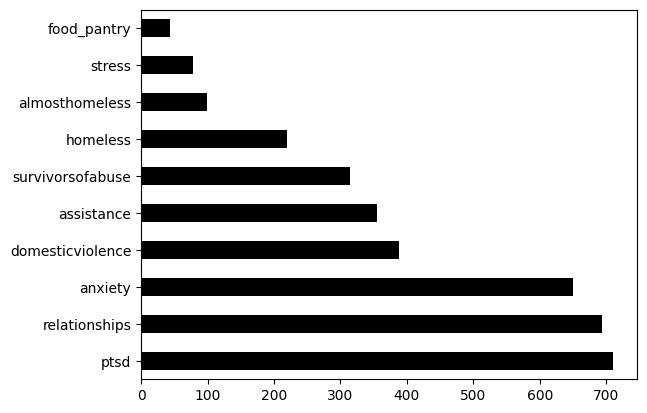

In [98]:
print(whole.subreddit.value_counts())
whole.subreddit.value_counts().plot.barh(color='black')

In [99]:
pd.crosstab(whole["subreddit"] , whole["label"])

label,0,1
subreddit,,
almosthomeless,40,59
anxiety,234,416
assistance,229,126
domesticviolence,139,249
food_pantry,26,17
homeless,139,81
ptsd,297,414
relationships,387,307
stress,33,45


<Axes: >

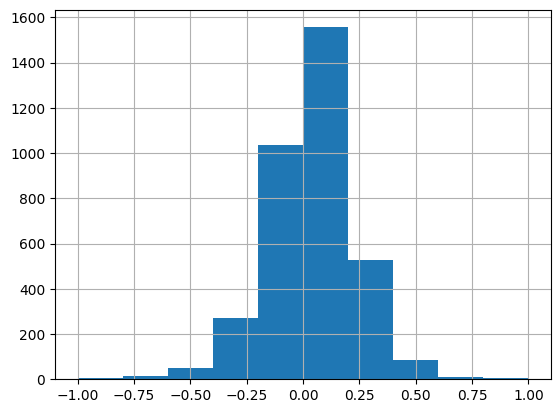

In [100]:
whole['sentiment'].hist()

In [101]:
full1 = whole[['text' , 'subreddit']].copy()
full1.head()

,text,subreddit
0,"He said he had not felt that way before, sugge...",ptsd
1,"Hey there r/assistance, Not sure if this is th...",assistance
2,My mom then hit me with the newspaper and it s...,ptsd
3,"until i met my new boyfriend, he is amazing, h...",relationships
4,October is Domestic Violence Awareness Month a...,survivorsofabuse


In [102]:
import plotly.express as px 
values = whole['subreddit'].value_counts()
labels = whole['subreddit'].value_counts().index

fig = px.pie(whole, names=labels, values=values)
fig.update_layout(title='Distribution of Subreddits', template='plotly_dark')
fig.update_traces(hovertemplate='%{label}: %{value}')
fig.show()

In [103]:
from wordcloud import WordCloud,STOPWORDS

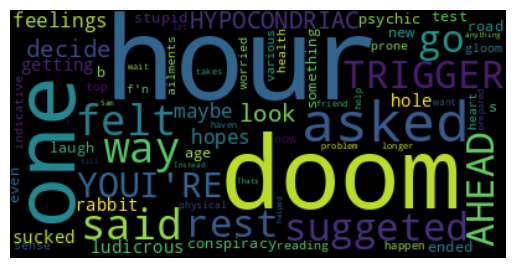

In [104]:
# Start with one review:
text = whole.text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

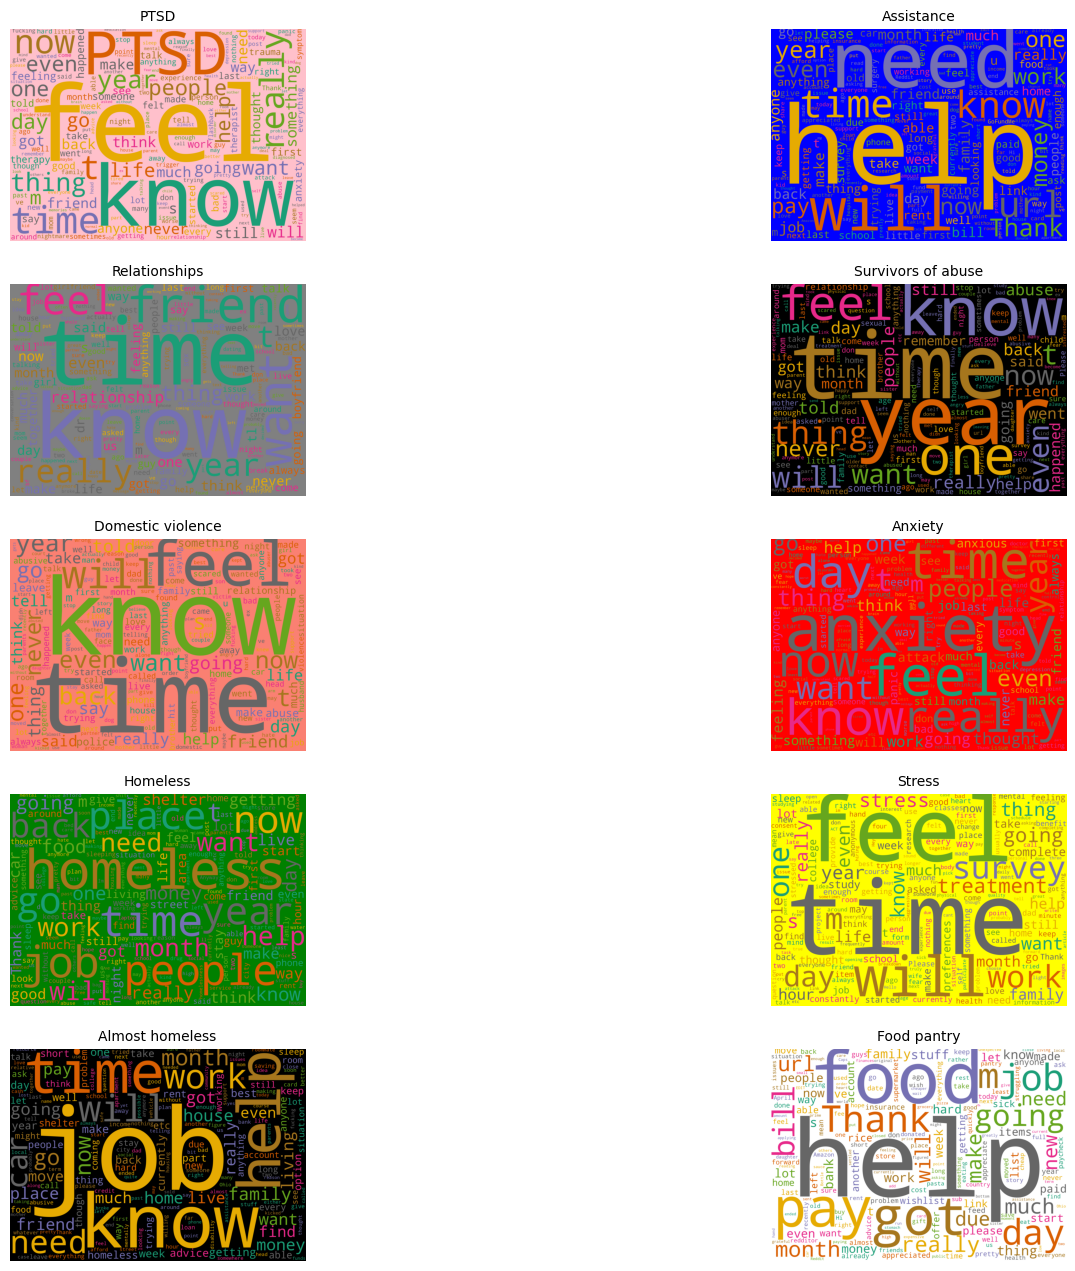

In [105]:
plt.figure(figsize=(18,16))
subset = whole[whole['subreddit']=='ptsd']
text = subset.text.values
cloud1=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(5,2,1)
plt.axis('off')
plt.title("PTSD",fontsize=10)
plt.imshow(cloud1)

subset = whole[whole['subreddit']=='assistance']
text = subset.text.values
cloud2=WordCloud(stopwords=STOPWORDS,background_color='blue',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,2)
plt.axis('off')
plt.title("Assistance",fontsize=10)
plt.imshow(cloud2)

subset = whole[whole['subreddit']=='relationships']
text = subset.text.values
cloud3=WordCloud(stopwords=STOPWORDS,background_color='gray',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,3)
plt.axis('off')
plt.title("Relationships",fontsize=10)
plt.imshow(cloud3)

subset = whole[whole['subreddit']=='survivorsofabuse']
text = subset.text.values
cloud4=WordCloud(stopwords=STOPWORDS,background_color='black',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,4)
plt.axis('off')
plt.title("Survivors of abuse",fontsize=10)
plt.imshow(cloud4)

subset = whole[whole['subreddit']=='domesticviolence']
text = subset.text.values
cloud5=WordCloud(stopwords=STOPWORDS,background_color='salmon',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,5)
plt.axis('off')
plt.title("Domestic violence",fontsize=10)
plt.imshow(cloud5)


subset = whole[whole['subreddit']=='anxiety']
text = subset.text.values
cloud6=WordCloud(stopwords=STOPWORDS,background_color='red',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,6)
plt.axis('off')
plt.title("Anxiety",fontsize=10)
plt.imshow(cloud6)

subset = whole[whole['subreddit']=='homeless']
text = subset.text.values
cloud7=WordCloud(stopwords=STOPWORDS,background_color='green',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,7)
plt.axis('off')
plt.title("Homeless",fontsize=10)
plt.imshow(cloud7)

subset = whole[whole['subreddit']=='stress']
text = subset.text.values
cloud8=WordCloud(stopwords=STOPWORDS,background_color='yellow',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,8)
plt.axis('off')
plt.title("Stress",fontsize=10)
plt.imshow(cloud8)

subset = whole[whole['subreddit']=='almosthomeless']
text = subset.text.values
cloud9=WordCloud(stopwords=STOPWORDS,background_color='black',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,9)
plt.axis('off')
plt.title("Almost homeless",fontsize=10)
plt.imshow(cloud9)

subset = whole[whole['subreddit']=='food_pantry']
text = subset.text.values
cloud10=WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,10)
plt.axis('off')
plt.title("Food pantry",fontsize=10)
plt.imshow(cloud10)

In [106]:
# words by label 1
label_1_para = str.lower(''.join(whole[whole['label'] == 1]['text']))
label_1_para[:1000]

'he said he had not felt that way before, suggeted i go rest and so ..trigger ahead if youi\'re a hypocondriac like me: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something i could even laugh at down the road. no, i ended up reading that this sense of doom can be indicative of various health ailments; one of which i am prone to.. so on top of my "doom" to my gloom..i am now f\'n worried about my heart. i do happen to have a physical in 48 hours.my mom then hit me with the newspaper and it shocked me that she would do this, she knows i don\'t like play hitting, smacking, striking, hitting or violence of any sort on my person. do i send out this vibe asking for it from the universe? then yesterday i decided to take my friend to go help another "friend" move to a new place. while we were driving the friend we are moving strikes me on my shoulder. and i address it im

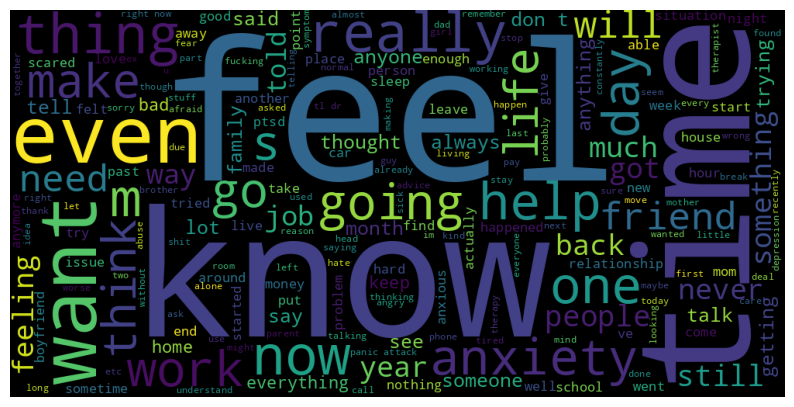

In [107]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(label_1_para)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [108]:
# words by label =! 1
label_0_para = str.lower(''.join(whole[whole['label'] == 0]['text']))
label_0_para[:1000]

"hey there r/assistance, not sure if this is the right place to post this.. but here goes =) i'm currently a student intern at sandia national labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. we're looking for current undergrad/grad stem students so if you're a stem student or know stem students, i would greatly appreciate if you can help take or pass along this short survey. as a thank you, everyone who helps take the survey will be entered in to a drawing for chance to win one of three $50 amazon gcs.it was a big company so luckily i didn't have to see him all the time, but when i did, he again acted as though i didn't exist. i tried to talk to him and update him on the pregnancy, and ask him to be involved for our child's sake, and he literally stared right through me without saying a word. 3 months after our daughter was born, i texted him and told him he was missing out on the most amazing person in t

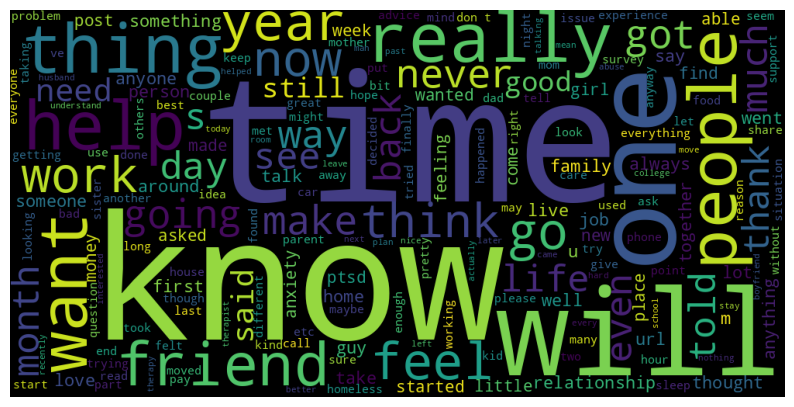

In [109]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(label_0_para)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [110]:
sentiment_pos = str.lower(''.join(whole[whole['sentiment'] > 0]['text']))
sentiment_pos[:1000]

'hey there r/assistance, not sure if this is the right place to post this.. but here goes =) i\'m currently a student intern at sandia national labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. we\'re looking for current undergrad/grad stem students so if you\'re a stem student or know stem students, i would greatly appreciate if you can help take or pass along this short survey. as a thank you, everyone who helps take the survey will be entered in to a drawing for chance to win one of three $50 amazon gcs.my mom then hit me with the newspaper and it shocked me that she would do this, she knows i don\'t like play hitting, smacking, striking, hitting or violence of any sort on my person. do i send out this vibe asking for it from the universe? then yesterday i decided to take my friend to go help another "friend" move to a new place. while we were driving the friend we are moving strikes me on my shoulder. a

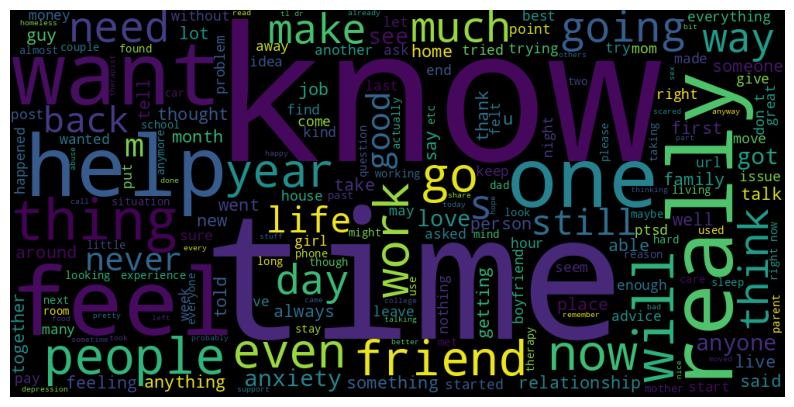

In [111]:
wordcloud2 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(sentiment_pos)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [112]:
sentiment_neg = str.lower(''.join(whole[whole['sentiment'] < 0]['text']))
sentiment_neg[:1000]

'he said he had not felt that way before, suggeted i go rest and so ..trigger ahead if youi\'re a hypocondriac like me: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something i could even laugh at down the road. no, i ended up reading that this sense of doom can be indicative of various health ailments; one of which i am prone to.. so on top of my "doom" to my gloom..i am now f\'n worried about my heart. i do happen to have a physical in 48 hours.october is domestic violence awareness month and i am a domestic violence survivor who is still struggling, even after over four years. lately i have been feeling very angry. angry that my abusive ex received no real consequences for his actions. this man abused me in all manners: physically, sexually, emotionally, verbally, financially, etc. i was granted a restraining order against him (and it was renewed a year later) b

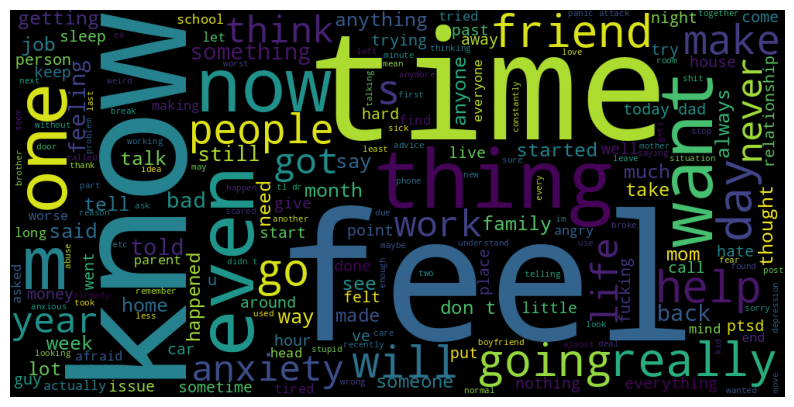

In [113]:
wordcloud2 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(sentiment_neg)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [114]:
full2 = whole[['text' , 'sentiment']].copy()
full2.head()

,text,sentiment
0,"He said he had not felt that way before, sugge...",-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0.292857
2,My mom then hit me with the newspaper and it s...,0.011894
3,"until i met my new boyfriend, he is amazing, h...",0.141671
4,October is Domestic Violence Awareness Month a...,-0.204167


In [115]:
full2['feeling'] = whole['label'].map({ 0 : 'Unstressed' , 1 :'Stressed'})
full2.head()

,text,sentiment,feeling
0,"He said he had not felt that way before, sugge...",-0.002742,Stressed
1,"Hey there r/assistance, Not sure if this is th...",0.292857,Unstressed
2,My mom then hit me with the newspaper and it s...,0.011894,Stressed
3,"until i met my new boyfriend, he is amazing, h...",0.141671,Stressed
4,October is Domestic Violence Awareness Month a...,-0.204167,Stressed


<Axes: xlabel='feeling', ylabel='count'>

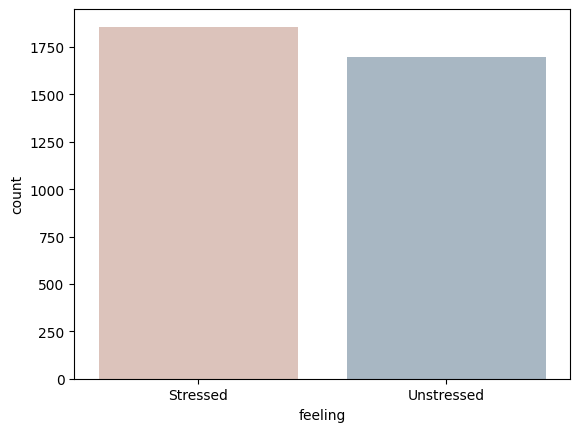

In [116]:
sns.countplot(x='feeling',data = full2, palette= ["#e1c0b6", "#a3b8c8"])

# **Machine Learning**

In [117]:
x = whole['text']
y= whole['label']

In [118]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [119]:
vect=CountVectorizer(stop_words="english")
x=vect.fit_transform(x)

In [120]:
x

<3553x12431 sparse matrix of type '<class 'numpy.int64'>'
	with 109629 stored elements in Compressed Sparse Row format>

In [121]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=0)

In [122]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(x_train,y_train)
y_predict = mb.predict(x_test)

from sklearn.metrics import accuracy_score
print("Model Accuracy is {p}%".format(p =round (accuracy_score(y_predict,y_test)*100, 2)))

from sklearn.metrics import classification_report
print(classification_report(y_test ,y_predict))
pd.crosstab(y_test , y_predict)

Model Accuracy is 72.01%
              precision    recall  f1-score   support

           0       0.78      0.60      0.68       351
           1       0.68      0.84      0.75       360

    accuracy                           0.72       711
   macro avg       0.73      0.72      0.72       711
weighted avg       0.73      0.72      0.72       711



col_0,0,1
label,,
0,211,140
1,59,301


In [123]:
from sklearn.linear_model import LogisticRegression
lo= LogisticRegression(random_state=0)
lo.fit(x_train, y_train)
y_predict = lo.predict(x_test)
print("Model Accuracy is {p}%".format(p =round (accuracy_score(y_predict,y_test)*100, 2)))

print(classification_report(y_test ,y_predict))
pd.crosstab(y_test , y_predict)

Model Accuracy is 71.59%
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       351
           1       0.72      0.72      0.72       360

    accuracy                           0.72       711
   macro avg       0.72      0.72      0.72       711
weighted avg       0.72      0.72      0.72       711



col_0,0,1
label,,
0,250,101
1,101,259


In [124]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
y_predict =d.predict(x_test)
print("Model Accuracy is {p}%".format(p =round (accuracy_score(y_test,y_predict)*100, 2)))

from sklearn.metrics import classification_report
print(classification_report(y_test ,y_predict))
pd.crosstab(y_test , y_predict)

Model Accuracy is 60.62%
              precision    recall  f1-score   support

           0       0.61      0.56      0.58       351
           1       0.60      0.65      0.63       360

    accuracy                           0.61       711
   macro avg       0.61      0.61      0.60       711
weighted avg       0.61      0.61      0.61       711



col_0,0,1
label,,
0,196,155
1,125,235


In [125]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("Model Accuracy is {p}%".format(p =round (accuracy_score(y_test,y_predict)*100, 2)))

from sklearn.metrics import classification_report
print(classification_report(y_test ,y_predict))
pd.crosstab(y_test , y_predict)

Model Accuracy is 69.76%
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       351
           1       0.69      0.72      0.71       360

    accuracy                           0.70       711
   macro avg       0.70      0.70      0.70       711
weighted avg       0.70      0.70      0.70       711



col_0,0,1
label,,
0,237,114
1,101,259


**testing models performance**

In [126]:
def trasactor(a):
  if op == 1:
    print('Unstressed')

  else:
    print('Stressed')

In [127]:
#Using Naive Bayes
prompt = "i am bad"
p = vect.transform([prompt]).toarray()
op = mb.predict(p)
print(trasactor(op))

Unstressed
None


In [128]:
#Using Naive Bayes
prompt = "i am bad"
p = vect.transform([prompt]).toarray()
op = lo.predict(p)
print(trasactor(op))

Stressed
None


In [129]:
#Using Naive Bayes
prompt = "i am bad"
p = vect.transform([prompt]).toarray()
op = d.predict(p)
print(trasactor(op))

Stressed
None


In [130]:
#Using Naive Bayes
prompt = "i am bad"
p = vect.transform([prompt]).toarray()
op = model.predict(p)
print(trasactor(op))

Unstressed
None


In [131]:
#Using Naive Bayes
prompt = "He felt underappreciated and resented his job"
m = vect.transform([prompt]).toarray()
mp = mb.predict(m)
print(trasactor(mp))

Unstressed
None


In [132]:
#Using Naive Bayes
prompt = "He felt underappreciated and resented his job"
m = vect.transform([prompt]).toarray()
mp = lo.predict(m)
print(trasactor(mp))

Unstressed
None


In [133]:
#Using Naive Bayes
prompt = "He felt underappreciated and resented his job"
m = vect.transform([prompt]).toarray()
mp = d.predict(m)
print(trasactor(mp))

Unstressed
None


In [134]:
prompt = "He felt underappreciated and resented his job"
m = vect.transform([prompt]).toarray()
mp = model.predict(m)
print(trasactor(mp))

Unstressed
None


In [135]:
#Using Logistic Regression
prompt = "The weather is pleasant"
p = vect.transform([prompt]).toarray()
op = d.predict(p)
print(trasactor(mp))

Unstressed
None


In [136]:
#Using Decision Trees
prompt = "Sometime I feel like I am sad"
a = vect.transform([prompt]).toarray()
ap = lo.predict(a)
print(trasactor(ap))

Unstressed
None


# **NEW DATA**

In [137]:
stress2 = pd.read_csv('/content/Stress.csv')

In [138]:
stress2.head(5)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [139]:
import plotly.express as px
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

import seaborn as sns 
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [140]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
     
    return result

In [141]:
stress2['clean_text'] = stress2['text'].apply(preprocess)

In [142]:
stress2['clean_text_joined']=stress2['clean_text'].apply(lambda x:" ".join(x))

In [143]:
maxlen = -1
for doc in stress2.clean_text_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a text is =", maxlen)
fig = px.histogram(stress2 , x = [len(x) for x in stress2.clean_text], nbins = 50,labels={'label':'Stress Condition'},
                  color=stress2.label)
fig.show()

The maximum number of words in a text is = 123


In [144]:
stressed_word=[]
for words in stress2[stress2.label == 1].clean_text:
    for token in words:
        stressed_word.append(token)
stressed_bigrams_series = (pd.Series(nltk.ngrams(stressed_word, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

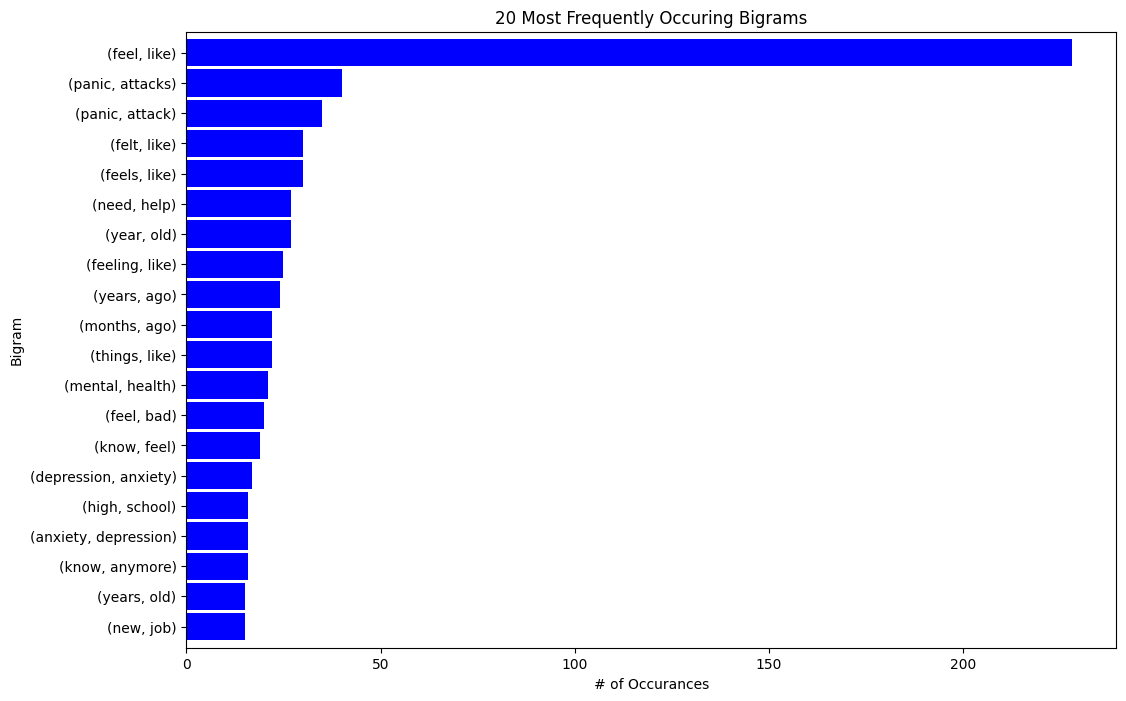

In [145]:
stressed_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

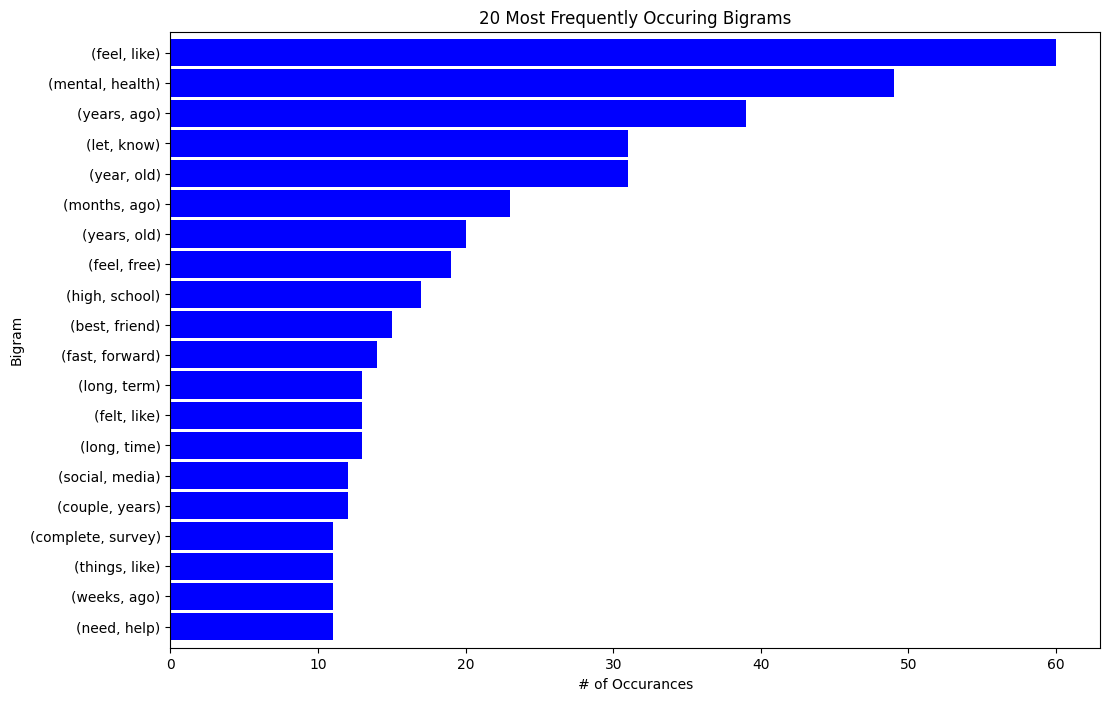

In [146]:
non_stressed_word=[]
for words in stress2[stress2.label == 0].clean_text:
    for token in words:
        non_stressed_word.append(token)
non_stressed_bigrams_series = (pd.Series(nltk.ngrams(non_stressed_word, 2)).value_counts())[:20]
non_stressed_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

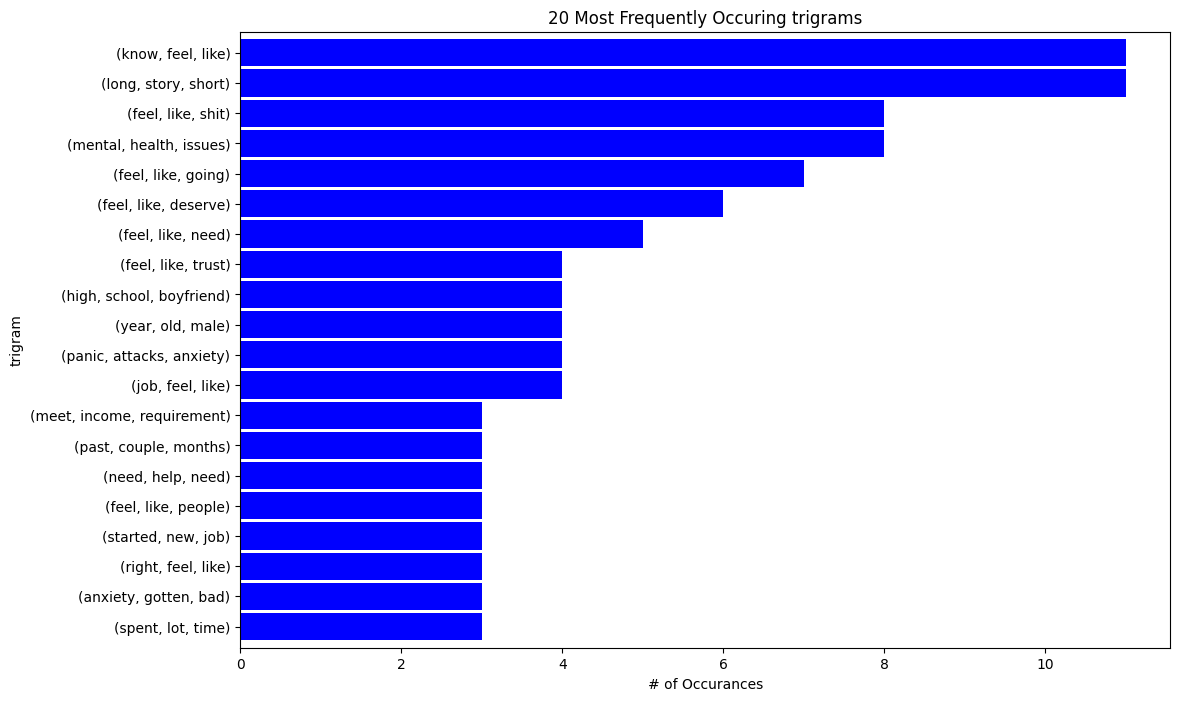

In [147]:
stressed_word=[]
for words in stress2[stress2.label == 1].clean_text:
    for token in words:
        stressed_word.append(token)
stressed_bigrams_series = (pd.Series(nltk.ngrams(stressed_word, 3)).value_counts())[:20]
stressed_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring trigrams')
plt.ylabel('trigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

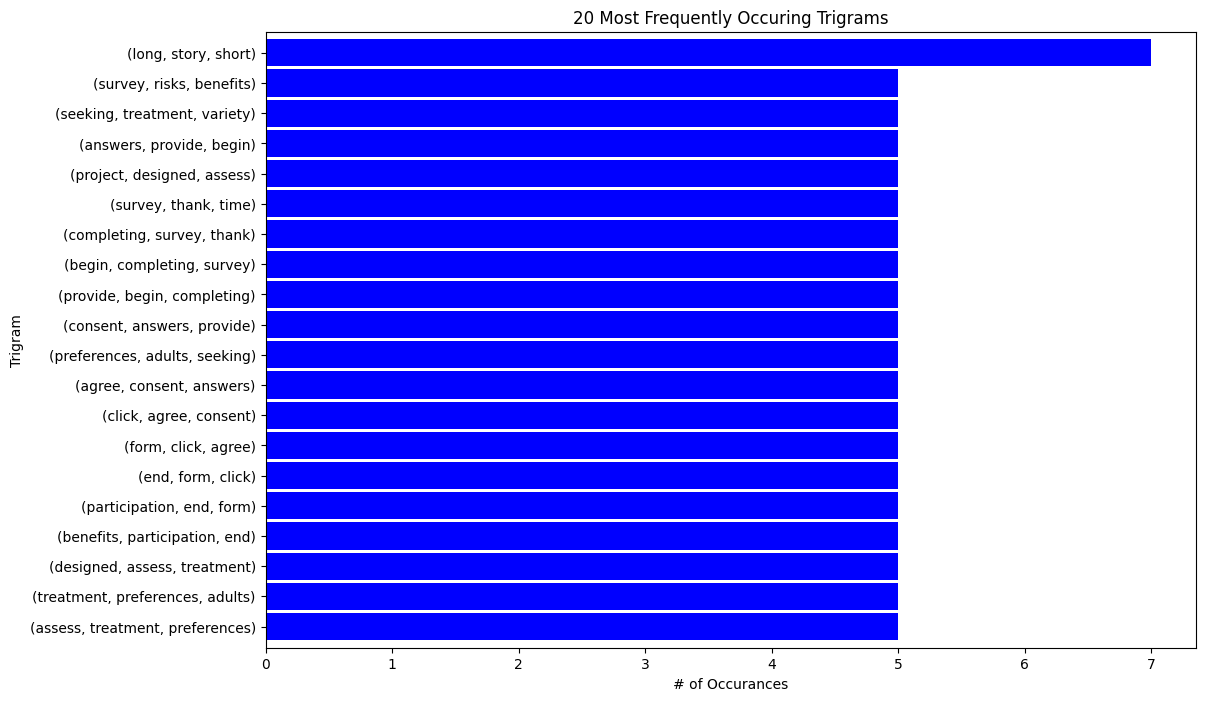

In [148]:
non_stressed_word=[]
for words in stress2[stress2.label == 0].clean_text:
    for token in words:
        non_stressed_word.append(token)
non_stressed_bigrams_series = (pd.Series(nltk.ngrams(non_stressed_word, 3)).value_counts())[:20]
non_stressed_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [149]:
human_stress = pd.read_csv('/content/Stress.csv')

In [150]:
human_stress['len']=[len(text) for text in human_stress['text']]

In [151]:
human_stress['label_in_value']=human_stress['label'].map({0:'No Stress',1:"Stress"})

In [152]:
from datetime import datetime
human_stress['date']=[ datetime.fromtimestamp(value) for value in human_stress['social_timestamp']]

In [153]:
human_stress['day']=[value for value in human_stress['date'].dt.day]
human_stress['month']=[value for value in human_stress['date'].dt.month]
human_stress['year']=[value for value in human_stress['date'].dt.year]
human_stress['hour']=[value for value in human_stress['date'].dt.hour]
human_stress['second']=[value for value in human_stress['date'].dt.second]
human_stress['day_name']=[value for value in human_stress['date'].dt.day_name()]
human_stress['day_of_week']=[value for value in human_stress['date'].dt.day_of_week]

In [154]:
human_stress.head(10)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,len,label_in_value,date,day,month,year,hour,second,day_name,day_of_week
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353,571,Stress,2018-03-21 06:39:13,21,3,2018,6,13,Wednesday,2
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,588,No Stress,2018-05-22 17:23:37,22,5,2018,17,37,Tuesday,1
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605,847,Stress,2018-09-03 00:46:45,3,9,2018,0,45,Monday,0
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,1277,Stress,2018-01-20 06:25:55,20,1,2018,6,55,Saturday,5
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005,533,Stress,2018-10-17 20:43:25,17,10,2018,20,25,Wednesday,2
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,1,1.0,1517274027,539,Stress,2018-01-30 01:00:27,30,1,2018,1,27,Tuesday,1
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,0,0.8,1512854409,588,No Stress,2017-12-09 21:20:09,9,12,2017,21,9,Saturday,5
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,1,0.8,1483582174,548,Stress,2017-01-05 02:09:34,5,1,2017,2,34,Thursday,3
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,1,0.6,1514843984,436,Stress,2018-01-01 21:59:44,1,1,2018,21,44,Monday,0
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1,1.0,1490428087,375,Stress,2017-03-25 07:48:07,25,3,2017,7,7,Saturday,5


In [155]:
remove_cols=['post_id','sentence_range','confidence','social_timestamp','date']
human_stress.drop(remove_cols,axis=1,inplace=True)

In [156]:
human_stress.groupby('subreddit')['len'].describe().sort_values('count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
ptsd,584.0,435.296233,157.677362,6.0,330.00,417.5,524.25,1271.0
relationships,552.0,463.898551,167.292838,142.0,354.00,428.0,539.00,1277.0
anxiety,503.0,447.763419,168.015419,6.0,338.00,418.0,532.50,1358.0
domesticviolence,316.0,436.512658,165.901395,6.0,335.00,406.5,512.25,1308.0
assistance,289.0,429.705882,143.763236,32.0,339.00,417.0,503.00,915.0
survivorsofabuse,245.0,473.485714,194.551557,88.0,348.00,437.0,559.00,1606.0
homeless,168.0,449.851190,177.114248,155.0,342.75,425.5,525.25,1281.0
almosthomeless,80.0,447.412500,208.517777,116.0,329.50,417.5,519.00,1639.0
stress,64.0,505.593750,203.001816,172.0,361.50,492.5,601.25,1354.0


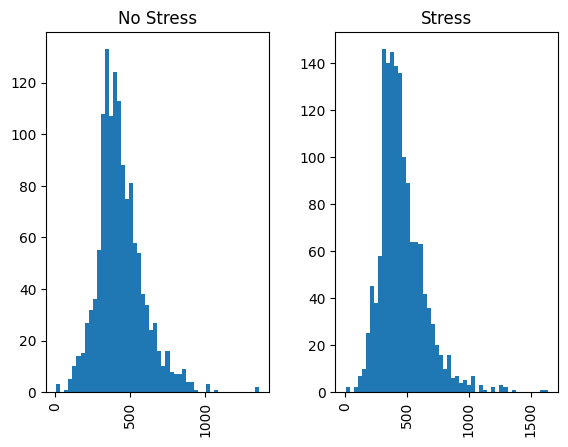

In [157]:
human_stress.hist(column='len',by='label_in_value',bins=50)
plt.show()

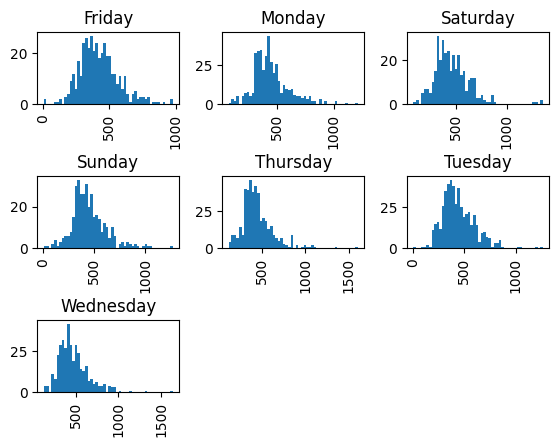

In [158]:
fig, ax = plt.subplots()
human_stress.hist(column='len',by='day_name',bins=50,ax=ax)
plt.subplots_adjust(hspace=1)
plt.show()

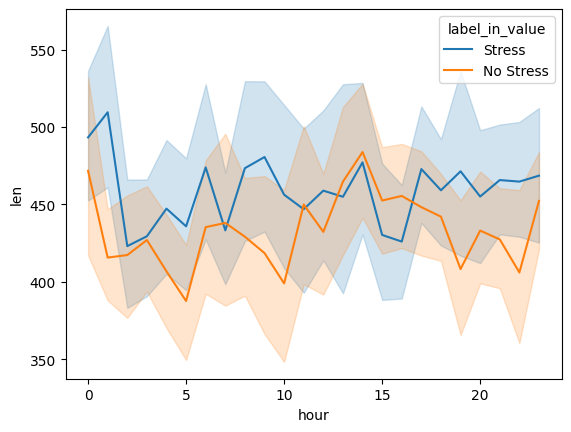

In [159]:
sns.lineplot(data=human_stress,x='hour',y='len',hue='label_in_value')
plt.show()

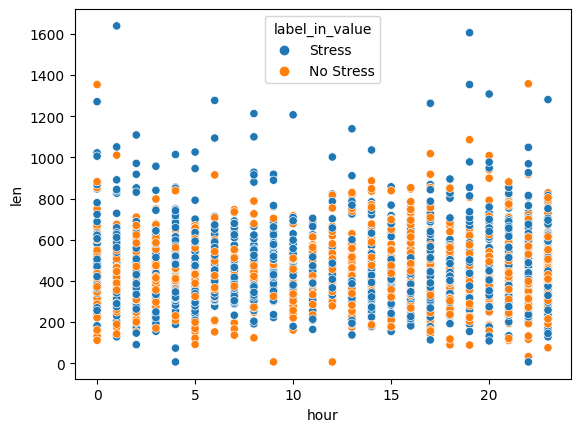

In [160]:
sns.scatterplot(data=human_stress,x='hour',y='len',hue='label_in_value')
plt.show()

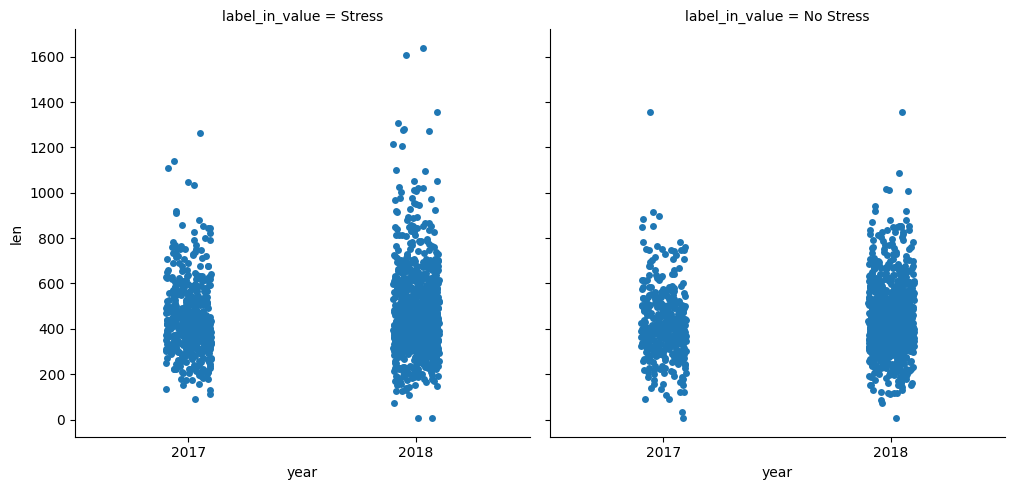

In [161]:
sns.catplot(data=human_stress,x='year',y='len',col='label_in_value',sharex=False,col_wrap=3)
plt.show()

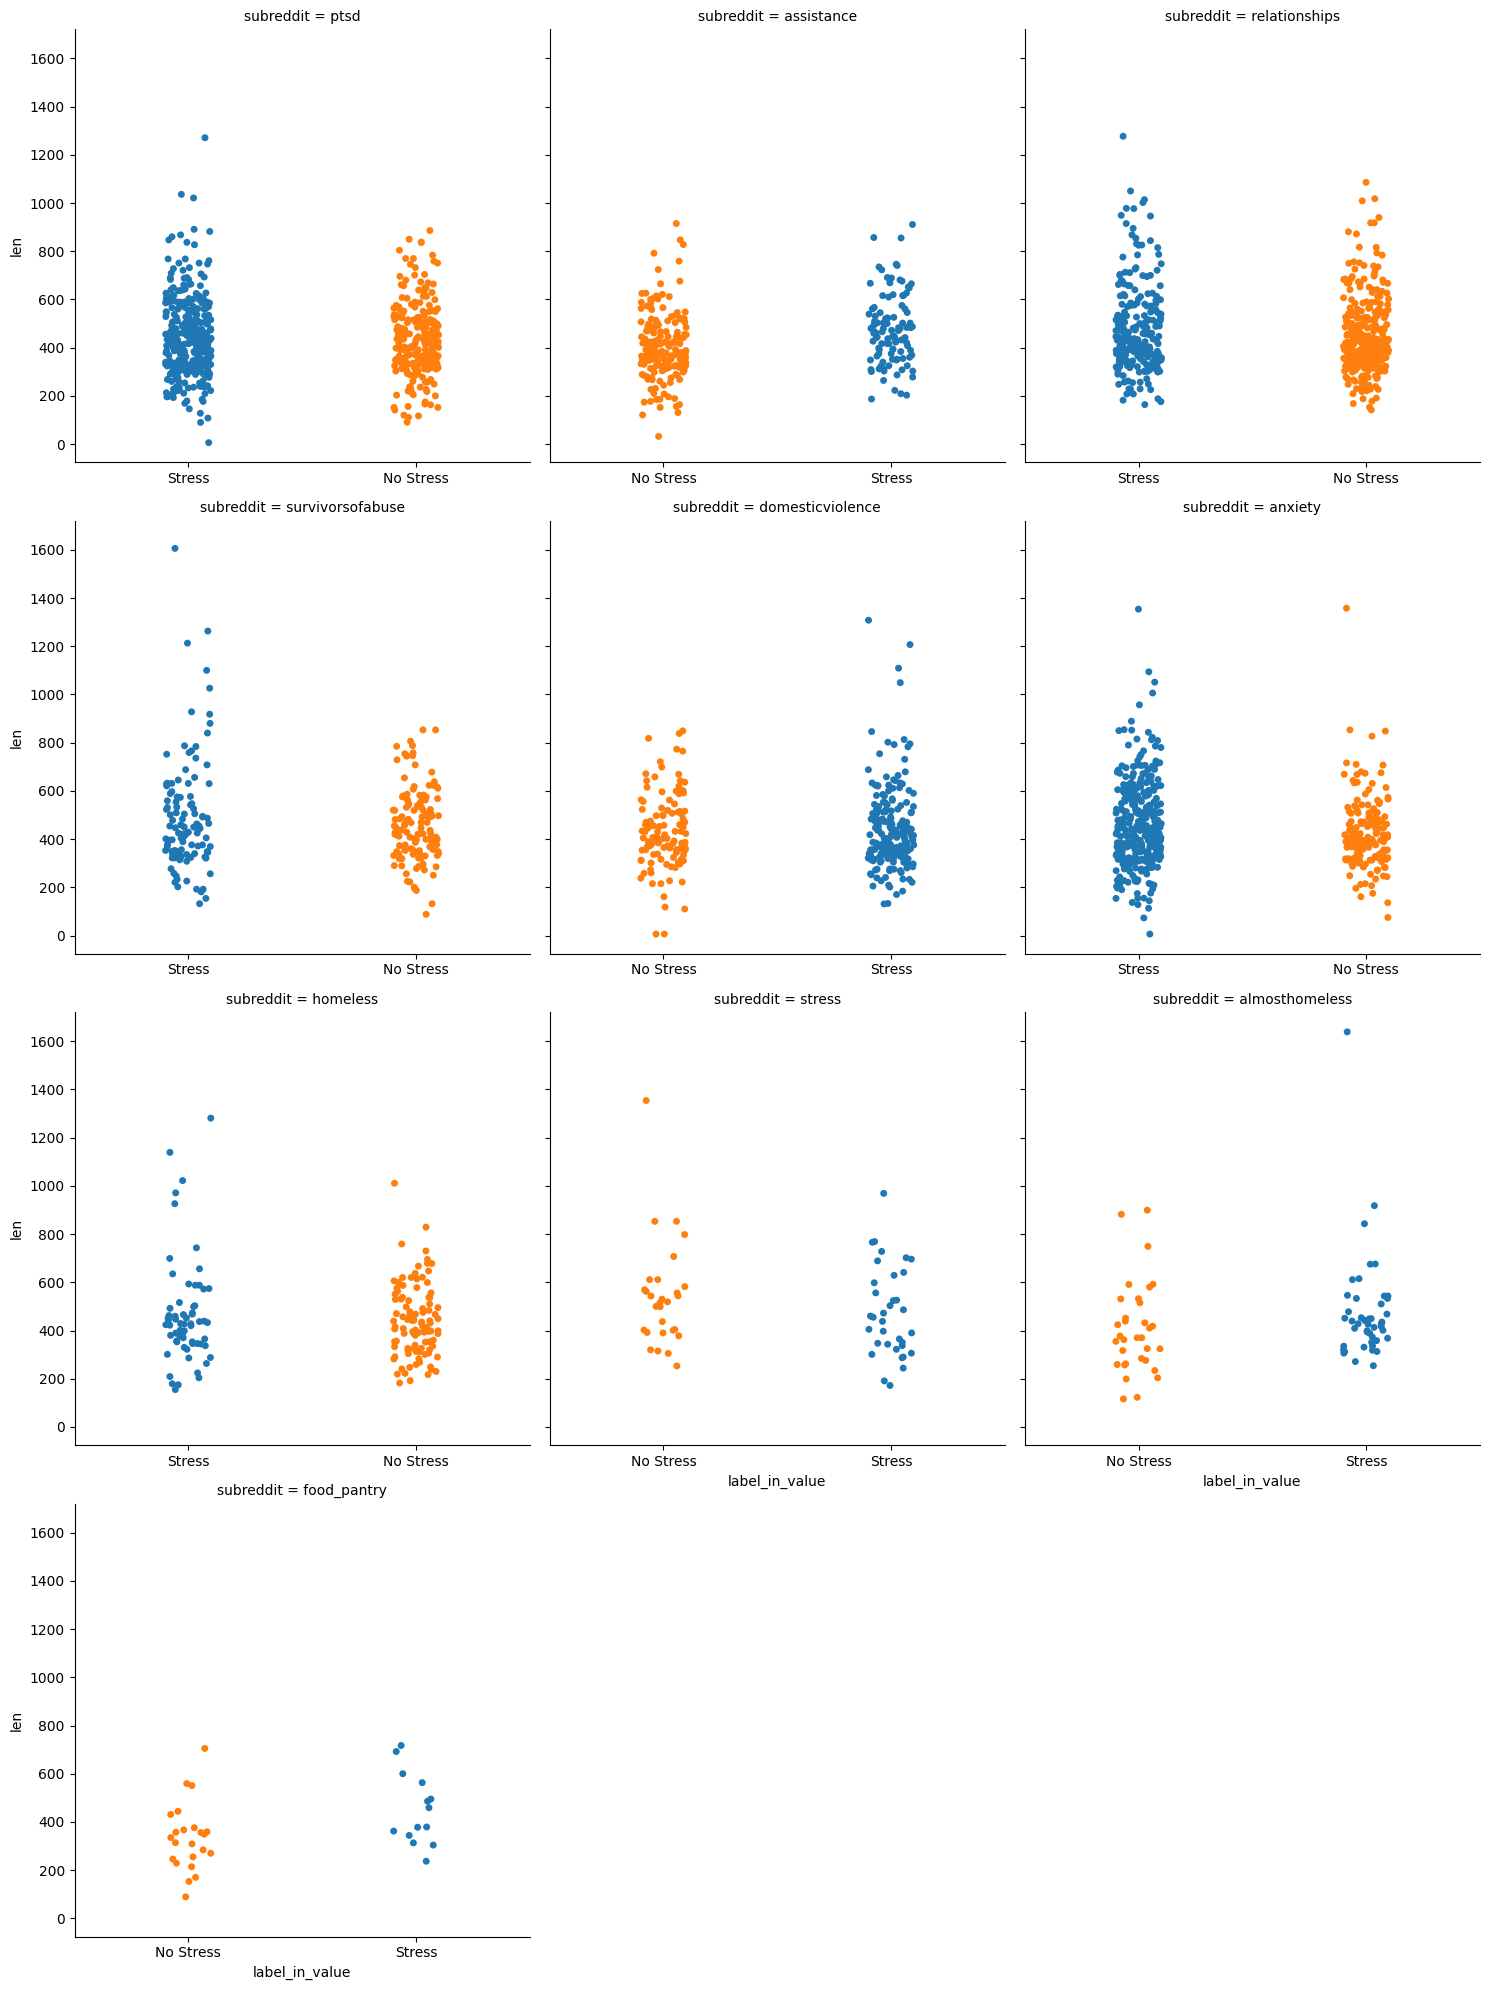

In [162]:
sns.catplot(data=human_stress,x='label_in_value',y='len',col='subreddit',col_wrap=3,hue='label_in_value',sharex=False)
plt.show()

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [164]:
import nltk
import re
from urllib.parse import urlparse
from spacy import load
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [165]:
nltk.download('omw-1.4') # Open Multilingual Wordnet, this is an lexical database 
nltk.download('wordnet') 
nltk.download('wordnet2022')
nltk.download('punkt')
nltk.download('stopwords')
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /root/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


cp: cannot stat '/usr/share/nltk_data/corpora/wordnet2022': No such file or directory


In [166]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [167]:
def textPocess(sent):
    try:
        # brackets replacing by space
        sent = re.sub('[][)(]',' ',sent)

        # url removing
        sent = [word for word in sent.split() if not urlparse(word).scheme]
        sent = ' '.join(sent)

        # removing escap characters
        sent = re.sub(r'\@\w+','',sent)

        # removing html tags 
        sent = re.sub(re.compile("<.*?>"),'',sent)

        # getting only characters and numbers from text
        sent = re.sub("[^A-Za-z0-9]",' ',sent)

        # lower case all words
        sent = sent.lower()
        
        # strip all words from sentences
        sent = [word.strip() for word in sent.split()]
        sent = ' '.join(sent)

        # word tokenization
        tokens = word_tokenize(sent)
        
        # removing words which are in stopwords
        for word in tokens:
            if word in stop_words:
                tokens.remove(word)
        
        # lemmatization
        sent = [lemmatizer.lemmatize(word) for word in tokens]
        sent = ' '.join(sent)
        return sent
    
    except Exception as ex:
        print(sent,"\n")
        print("Error ",ex)

In [168]:
stress2['processed_text'] = stress2['text'].apply(lambda text: textPocess(text))
stress2.sample(3)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,clean_text,clean_text_joined,processed_text
2314,domesticviolence,79tofd,"(15, 20)",then i check a side email account that i almos...,1,0.600000,1509426703,"[check, email, account, think, forgot, passwor...",check email account think forgot password emai...,check side email account almost never use thin...
2236,relationships,7sv6ty,"[5, 10]","So besides my dad, my entire family is toxic t...",0,0.600000,1516875672,"[dad, entire, family, toxic, mum, older, siste...",dad entire family toxic mum older sister uses ...,besides dad entire family toxic me mum older s...
1267,almosthomeless,6mfhhl,"(15, 20)",She is willing to surrender her cat it's just ...,1,0.714286,1499703565,"[willing, surrender, cat, difficult, place, li...",willing surrender cat difficult place live stu...,is willing surrender cat s difficult find plac...


In [169]:
print("without process ----> ",stress2['text'].iloc[23],end='\n\n')
print("after process ----> ",stress2['processed_text'].iloc[23])

without process ---->  With a switch blade and open arms In a sweater vest that covers a ragged undershirt stained with my innocence Through faces that are never the same as the ones I dread finding in the crowd In the night, I rediscover my love of mares and how hoarse I can be in the morning It's the taste of blood but I am not bleeding

after process ---->  switch blade open arm a sweater vest cover a ragged undershirt stained innocence face are never same one dread finding crowd the night rediscover my love mare how hoarse can in the morning s the taste blood i not bleeding


In [170]:
from sklearn.feature_extraction.text import CountVectorizer
MIN_DF = 1

In [171]:
cv = CountVectorizer(min_df=MIN_DF)
cv_df = cv.fit_transform(stress2['processed_text'])
cv_df.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [172]:
cv_df = pd.DataFrame(cv_df.toarray(),columns=cv.get_feature_names_out())
cv_df.head(3)

,00,000,02,06,10,100,1000,100kg,100mg,100x,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
X_train,X_test,y_train,y_test = train_test_split(cv_df,stress2['label'],stratify=stress2['label'])
X_train.shape,y_test.shape

((2128, 10267), (710,))

In [174]:
model_lr = LogisticRegression().fit(X_train,y_train)
model_lr.score(X_train,y_train),model_lr.score(X_test,y_test)

(0.9967105263157895, 0.7394366197183099)

In [175]:
def predictor(text):
    processed = textPocess(text)
    embedded_words = cv.transform([text])
    res = model_lr.predict(embedded_words)
    if res[0] == 1:
        res = "this person is in stress"
    else:
        res = "this person is not in stress"
    return res

In [176]:
text1 = """This is the worst thing that happened to me today. I got less marks in my exam, 
            so it is not going to help me in my future."""
text2 = """Hi Shashank sir, I gained a lot of knowledge from you for my future use. 
            This was a very fun journey for me. Thanks for boosting my confidence."""

text3 = """ I am very good today and i feel it help me to control my life"""            

In [177]:
print(predictor(text1))
print(predictor(text2))
print(predictor(text2))

this person is in stress
this person is not in stress
this person is not in stress
